# ML Assignment

Question:

Image quality detection has always been an arduous problem to solve in computer vision. 

In this assignment you have to come up with features and models to build a classifier which will predict whether a given image is blurred.

Heads-up: You can train CNN if you want, but beware of the time running out.
    
Dataset:
http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
    
Note: 
Details about the dataset is present in README.txt inside the zip.
The dataset is of ~3.7 GB. Parallely solving the problem while downloading helps.

Instructions
Submit your model, train script, test script and support files through a private bitbucket repository with read access granted to ‘yuyudhan’ and ‘saravananzbucket’ usernames
The test script should log the accuracy of your model on evaluation set.
Your submission should contain a detailed README.md, to help us understand and run at our end. 
Don’t include any library files, instead provide instructions on how we can install at our end.

Judgement:
Both Machine Learning and Computer Vision/Image Processing skills will be judged

Novelty of thinking involved in feature engineering.
Accuracy of the classification model.
Inference time

Constraints:
You are free to use your favourite libraries/frameworks. Kindly avoid using Matlab.
Submission:
16 Hours from when the assignment was received.


# Identifying Blurry Photos

My goal here is to classify good and bad quality photos using a neural network. The idea for a tool like this hit me when I uploaded several hundred photos from my digital SLR camera and needed to sort through them all. In particular, just getting all the blurry, dark, or overexposed photos out of the way would be a big help.

# Transfer learning, or training from scratch

My initial experimentation involved applying transfer learning to the “Inception” architecture, which is pre-trained on thousands of images for the specific purpose of photo classification. However, I quickly realized that since my primary goal was to identify and separate blurry photos from a library of images, I needed a convolutional neural network (CNN) architecture that simply did well with edge detection. The “Inception” architecture has over 200 layers, but understanding edges is what happens in the initial layers. Thus, I switched gears to the much simpler LeNet architecture, often considered a good starting point for a basic CNN. This architecture has 5 layers: 2 convolutional layers and 3 dense (fully-connected) layers.

# The training dataset

I wasn’t initially sure how many images I’d need to train on, but I wanted to start with a reasonably large set that included distinctly clear images and the CERTH Image Blur Dataset, which contains 1200 images that the researchers already marked as clear, good-quality images. I applied an artifical blur (Gaussian blurring using OpenCV) to these images, so I had a total of 2400 images: half clear and half blurry. The researchers did also provide both artificially blurred photos and blurry photos taken by an actual camera. However, I chose not use these photos for model training as I wanted to control the level of blurring myself. Instead, I used their naturally blurry images (1000 provided) as a test set for my model.

# Results

As a quick test, I trained my model on just 300 photos over 5 epochs and got a pretty impressive 98% accuracy (train/validation split). Clearly the neural network was already able to capture the presence of edges, which is what I had intended. On the test set from the researchers of blurry photos from an actual camera, it correctly labeled around 50% of them (the blurriest 50%), while it missed some of the more subtle blurring effects that a human would have noticed. I later retrained it on 3000 images per epoch and test set accuracy improved to 65%. There’s definitely some opportunity to improve here by continuing to retrain this model for better blur detection, or to adjust the classification threshold depending on individual tolerance for false positives vs. false negatives.

# Bonus Results

One additional positive result from my model is the example of a clear subject with blurry background.M3_photo

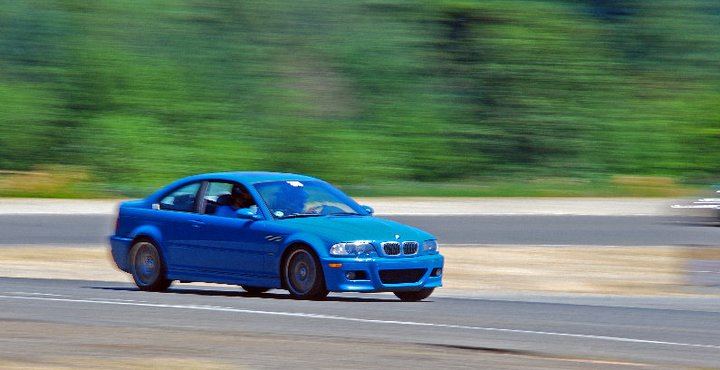



I was happy to find that my trained neural network classified images like these as CLEAR - without me ever actually training it on images like these! In fact, I found this dataset of stock photos that contains 1000 such images, and it classified them as clear with 90% accuracy. Overall, that’s really great news for my purposes because these are the kinds of images that I would want to keep.

# Neural net architecture built using Keras and Tensorflow

In [ ]:
import numpy as np
import pandas as pd
import os

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense, Activation, Dropout
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# My LeNet architecture
model = Sequential()

# conv filters of 5x5 each

# Layer 1
model.add(Convolution2D(32, 5, 5, input_shape=(192, 192, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Convolution2D(64, 5, 5))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))    

model.add(Flatten())

# Layer 3
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))

# Layer 5
model.add(Dense(2))
model.add(Activation("softmax"))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Load Data Set

In [ ]:
X = []
y = []

In [ ]:
with open("X.pkl", 'rb') as picklefile: 
    X = pickle.load(picklefile)

In [ ]:
with open("y.pkl", 'rb') as picklefile: 
    y = pickle.load(picklefile)

In [ ]:
# set folder path
folderpath = 'Images/Train/Undistorted/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        X.append(np.asarray(img))
        y.append(0)
    else:
        print filename, 'not a pic'

In [ ]:
import pickle


In [ ]:
with open('undistorted_X.pkl', 'wb') as picklefile:
    pickle.dump(X, picklefile)

In [ ]:
with open('undistorted_y.pkl', 'wb') as picklefile:
    pickle.dump(y, picklefile)

In [ ]:
# set folder path
folderpath = 'Images/Train/DigitalBlur2/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        X.append(np.asarray(img))
        y.append(1)
    else:
        print filename, 'not a pic'

In [ ]:
len(y)


In [ ]:
with open('X.pkl', 'wb') as picklefile:
    pickle.dump(X, picklefile)

In [ ]:
with open('y.pkl', 'wb') as picklefile:
    pickle.dump(y, picklefile)

In [ ]:
X_stacked = np.stack(X)
X_norm = X_stacked/255.
y_cat = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_cat, train_size=2500, random_state=42)

In [ ]:
# Data augmenter
dg = image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# Load initial model weights

In [ ]:
model.load_weights('lenet_weights.h5')


# Model

In [ ]:
cb_es = EarlyStopping(monitor='val_acc', patience=2, verbose=1)
cb_mc = ModelCheckpoint('lenet_weights2.h5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
# Fit generator
# play with samples/epoch, nb_epoch, val_samples.

model.fit_generator(dg.flow(X_train, y_train), samples_per_epoch=3000, nb_epoch=30, validation_data=dg.flow(X_test, y_test), nb_val_samples=300, callbacks=[cb_es, cb_mc])

# Test on real pictures

In [ ]:
clean_pics = []
blurry_pics = []

In [ ]:
backBlur_pics = []


In [ ]:
# set folder path
folderpath = 'Images/clearSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        clean_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

In [ ]:
# set folder path
folderpath = 'Images/natblurSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        blurry_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

In [ ]:
# set folder path
folderpath = 'Images/backBlurSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        backBlur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

In [ ]:
len(backBlur_pics)

In [ ]:
backBlur_pics_array = np.stack(backBlur_pics)/255.


In [ ]:
len(blurry_pics)


In [ ]:
clean_pics_array = np.stack(clean_pics)/255.


In [ ]:
blurry_pics_array = np.stack(blurry_pics)/255.


In [ ]:
blurry_pics_array.shape


In [ ]:
model.predict_classes(clean_pics_array)


In [ ]:
model.predict_proba(clean_pics_array)


In [ ]:
model.predict_classes(blurry_pics_array)


In [ ]:
model.predict_proba(blurry_pics_array)


In [ ]:
model.predict_proba(backBlur_pics_array)


In [ ]:
plt.imshow(blurry_pics_array[0])
plt.show()

In [ ]:
model.save('lenet_3rdPass.h5')


In [ ]:
model.save_weights('test_weights.h5')


# Test the classifier on background blur only set

In [ ]:
backBlur_pics = []
backBlur_filenames = []

# set folder path
folderpath = 'Images/backBlurAll_longIter/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        backBlur_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        backBlur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_backBlur = pd.DataFrame(backBlur_filenames, columns=['filename'])

In [ ]:
backBlur_pics_array = np.stack(backBlur_pics)/255.


In [ ]:
df_backBlur['blur_class'] = model.predict_classes(backBlur_pics_array)


In [ ]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_backBlur.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

# Test the classifier on the naturally blurred set

In [ ]:
natBlur_pics = []
natBlur_filenames = []

# set folder path
folderpath = 'Images/natBlurAll_longIter/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        natBlur_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        natBlur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_natBlur = pd.DataFrame(natBlur_filenames, columns=['filename'])

In [ ]:
natBlur_pics_array = np.stack(natBlur_pics)/255.


In [ ]:
df_natBlur['blur_class'] = model.predict_classes(natBlur_pics_array)


In [ ]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_natBlur.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

# Test classifier on M3 pictures 

In [ ]:
m3Blur_pics = []
m3Blur_filenames = []

# set folder path
folderpath = 'Images/M3Samples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        m3Blur_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        m3Blur_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_m3Blur = pd.DataFrame(m3Blur_filenames, columns=['filename'])

In [ ]:
m3Blur_pics_array = np.stack(m3Blur_pics)/255.


In [ ]:
df_m3Blur['blur_class'] = model.predict_classes(m3Blur_pics_array)


In [ ]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_m3Blur.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

In [ ]:
df_m3Blur


# Test my clear samples

In [ ]:
clearSample_pics = []
clearSample_filenames = []

# set folder path
folderpath = 'Images/clearSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        clearSample_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        clearSample_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_clearSample = pd.DataFrame(clearSample_filenames, columns=['filename'])
clearSample_pics_array = np.stack(clearSample_pics)/255.
df_clearSample['blur_class'] = model.predict_classes(clearSample_pics_array)

In [ ]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_clearSample.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

# Test my bad samples 

In [ ]:
blurSample_pics = []
blurSample_filenames = []

# set folder path
folderpath = 'Images/natBlurSamples/'

# load image arrays
for filename in os.listdir(folderpath):
    if filename != '.DS_Store':
        blurSample_filenames.append(filename)
        imagepath = folderpath + filename
        img = image.load_img(imagepath, target_size=(192,192))
        blurSample_pics.append(np.asarray(img))
    else:
        print filename, 'not a pic'

df_blurSample = pd.DataFrame(blurSample_filenames, columns=['filename'])
blurSample_pics_array = np.stack(blurSample_pics)/255.
df_blurSample['blur_class'] = model.predict_classes(blurSample_pics_array)

In [ ]:
if not os.path.exists(folderpath+'blurry'):
    os.mkdir(folderpath+'blurry')

for index, row in df_blurSample.iterrows():
    if row['blur_class'] == 1:
        oldpath = folderpath + row['filename']
        newpath = folderpath + 'blurry/' + row['filename']
        os.rename(oldpath, newpath)

In [ ]:
img = image.load_img('Images/NaturalBlurSet.xlsx', target_size=(192,192))


In [ ]:
'.JPG'.lower()
